In [1]:
import cvxopt
import numpy as np
import pandas as pd

In [2]:
class SVM(object):
    
    def __init__(self, C=None):
        self.C = C
        if self.C is not None: self.C = float(self.C)
            
    def fit(self, X, y, show_process):
        m_samples = X.shape[0]
        
        
        #Gram matrix
        K = np.array([np.dot(X[i], X[j])
             for j in range(m_samples)
             for i in range(m_samples)]).reshape((m_samples,m_samples))
        
        
        P = cvxopt.matrix(np.outer(y,y)*K)
        if show_process == True:
            print("P: ")
            print(P)
        
        q = cvxopt.matrix(-1 * np.ones(m_samples))
        if show_process == True:
            print("q: ")
            print(q)
            
        A = cvxopt.matrix(y, (1,m_samples))
        if show_process == True:
            print("A: ")
            print(A)
            
        b = cvxopt.matrix(0.0)
        if show_process == True:
            print("b: ")
            print(b)
        
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(-1 * np.ones(m_samples))
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2))) #vstack noi 2 ma tran theo chieu doc
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
            
        if show_process == True:
            print("G: ")
            print(G)
            print("h: ")
            print("h")
        
        if show_process == True:
            print("solve: ...")
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        
        self.alphas = np.ravel(solution['x'])
        if show_process == True:
            print("alphas: ")
            print(self.alphas)
            
        alphas_positive = (self.alphas >= 1e-6) 
        self.support_vectors = X[alphas_positive]
        self.support_vectors_label = y[alphas_positive]
        
        self.w = np.sum(self.alphas[i] * y[i] * X[i]
                 for i in range(len(y)))
        print("w: ")
        print(self.w)
        
        self.b = np.sum([ self.support_vectors_label[i] - np.dot(self.w,  self.support_vectors[i])
                  for i in range(len( self.support_vectors))]) / len( self.support_vectors)
        print("b: ")
        print(self.b)
        

In [3]:
X = np.array([[1., 3.],[1. ,6.],[2. ,1.],[2. ,5.],[3. ,2.],[4. ,1.]])
y = np.array([1., 1., -1., 1., -1., -1.])

#X = np.array([[10., 30.],[10. ,60.],[20. ,10.],[20. ,50.],[30. ,20.],[40. ,10.], [50, 10.0]])
#y = np.array([1., 1., -1., 1., -1., -1., -1.])

#X = np.array([[8, 7], [4, 10], [9, 7], [7, 10],[9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],[4, 6], [1, 3], [2, 5]])
#y = np.array([1, 1., 1., 1,1, 1, 1, -1, -1, -1, -1,-1, -1, -1])


clf = SVM(C=100)
clf.fit(X, y, True)
w = clf.w
b = clf.b

P: 
[ 1.00e+01  1.90e+01 -5.00e+00  1.70e+01 -9.00e+00 -7.00e+00]
[ 1.90e+01  3.70e+01 -8.00e+00  3.20e+01 -1.50e+01 -1.00e+01]
[-5.00e+00 -8.00e+00  5.00e+00 -9.00e+00  8.00e+00  9.00e+00]
[ 1.70e+01  3.20e+01 -9.00e+00  2.90e+01 -1.60e+01 -1.30e+01]
[-9.00e+00 -1.50e+01  8.00e+00 -1.60e+01  1.30e+01  1.40e+01]
[-7.00e+00 -1.00e+01  9.00e+00 -1.30e+01  1.40e+01  1.70e+01]

q: 
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

A: 
[ 1.00e+00  1.00e+00 -1.00e+00  1.00e+00 -1.00e+00 -1.00e+00]

b: 
[ 0.00e+00]

G: 
[-1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00]
[ 1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:69: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [4]:
import matplotlib.pyplot as plt


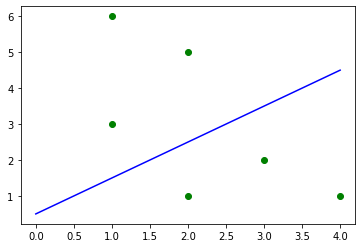

In [9]:
x = np.linspace(0, 4, 10)
plt.plot(X[:,0], X[:,1], 'go')
plt.plot(x, (-b - x*w[0])/w[1], 'b-')


w =  [[-0.66646154  0.66646154]]
b =  [-0.33333333]


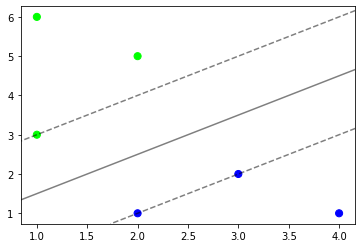

In [10]:

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt



# #############################################################################
# Fit regression model
svc_lin = SVC(kernel='linear', C=100, gamma='auto')
svc_lin.fit(X, y)
w = svc_lin.coef_
b = svc_lin.intercept_
print('w = ', w)
print('b = ', b)

# #############################################################################
def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg');
plot_svc_decision_function(svc_lin)
plt.show()

